# Intro to Azure Quantum

- Main Documentation: [Azure Quantum documentation (preview)](https://learn.microsoft.com/en-us/azure/quantum/?WT.mc_id=Portal-HubsExtension)
- [What is Azure Quantum?](https://learn.microsoft.com/en-us/azure/quantum/overview-azure-quantum)
- [How to submit a circuit with Qiskit to Azure Quantum](https://learn.microsoft.com/en-us/azure/quantum/quickstart-microsoft-qiskit?tabs=tabid-ionq&pivots=platform-portal)

In [2]:
%pip install --upgrade "azure-quantum[qiskit]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import azure.quantum
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from azure.quantum.qiskit import AzureQuantumProvider

In [5]:
from azure.quantum import Workspace

workspace = Workspace ( 
    resource_id = "/subscriptions/bb7d82f6-5626-486b-8e29-835b0d417e07/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/Tester", # Add your resource_id 
    location = "East US"  # Add your workspace location (for example, "westus") 
)

provider = AzureQuantumProvider(workspace)

In [6]:
print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

This workspace's targets:
- ionq.simulator
- ionq.simulator
- ionq.simulator
- ionq.qpu
- ionq.qpu
- ionq.qpu
- ionq.qpu.aria-1
- ionq.qpu.aria-1
- ionq.qpu.aria-1
- ionq.qpu.aria-2
- ionq.qpu.aria-2
- ionq.qpu.aria-2
- quantinuum.sim.h1-1sc
- quantinuum.sim.h1-1sc
- quantinuum.sim.h1-2sc
- quantinuum.sim.h1-2sc
- quantinuum.sim.h1-1e
- quantinuum.sim.h1-1e
- quantinuum.sim.h1-2e
- quantinuum.sim.h1-2e
- quantinuum.qpu.h1-1
- quantinuum.qpu.h1-1
- quantinuum.qpu.h1-2
- quantinuum.qpu.h1-2
- rigetti.sim.qvm
- rigetti.qpu.ankaa-9q-1
- rigetti.qpu.ankaa-2
- microsoft.estimator


In [7]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(3, 3)
circuit.name = "Qiskit Sample - 3-qubit GHZ circuit"
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0,1,2], [0, 1, 2])

# Print out the circuit
circuit.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [8]:
simulator_backend = provider.get_backend("ionq.simulator")

In [9]:
from qiskit import transpile
circuit = transpile(circuit, simulator_backend)

In [10]:
job = simulator_backend.run(circuit, shots=100)
job_id = job.id()
print("Job id", job_id)

Job id dd4e4854-ec91-11ee-8aca-acde48001122


In [11]:
result = job.result()
print(result)

Result(backend_name='ionq.simulator', backend_version='1', qobj_id='Qiskit Sample - 3-qubit GHZ circuit', job_id='dd4e4854-ec91-11ee-8aca-acde48001122', success=True, results=[ExperimentResult(shots=100, success=True, meas_level=2, data=ExperimentResultData(counts={'000': 51, '111': 49}, probabilities=defaultdict(<class 'int'>, {'000': 0.5, '111': 0.5})), header=QobjExperimentHeader(meas_map='[0, 1, 2]', metadata={}, name='Qiskit Sample - 3-qubit GHZ circuit', num_qubits='3', qiskit='True'))], date=None, status=None, header=None, error_data=None)


{'000': 51, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 49}


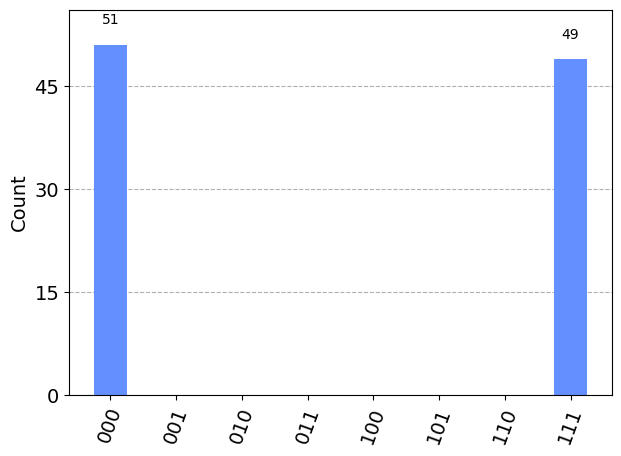

In [12]:
counts = {format(n, "03b"): 0 for n in range(8)}
counts.update(result.get_counts(circuit))
print(counts)
plot_histogram(counts)

In [13]:
backend = provider.get_backend("ionq.qpu")
cost = backend.estimate_cost(circuit, shots=1024)

print(f"Estimated cost: {cost.estimated_total}")

Estimated cost: 1.0


In [16]:
qpu_backend = provider.get_backend("rigetti.qpu.ankaa-2")

Job id b49fa022-ec98-11ee-8aca-acde48001122
..........Result(backend_name='rigetti.qpu.ankaa-2', backend_version='1', qobj_id='Qiskit Sample - 3-qubit GHZ circuit', job_id='b49fa022-ec98-11ee-8aca-acde48001122', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'111': 356.0, '000': 416.0, '101': 39.0, '011': 64.0, '100': 28.0, '001': 69.0, '110': 29.0, '010': 23.0}, probabilities={'111': 0.34765625, '000': 0.40625, '101': 0.0380859375, '011': 0.0625, '100': 0.02734375, '001': 0.0673828125, '110': 0.0283203125, '010': 0.0224609375}), header=QobjExperimentHeader(metadata={}, name='Qiskit Sample - 3-qubit GHZ circuit', num_qubits='3', qiskit='True'))], date=None, status=None, header=None, error_data=None)
{'000': 416.0, '001': 69.0, '010': 23.0, '011': 64.0, '100': 28.0, '101': 39.0, '110': 29.0, '111': 356.0}


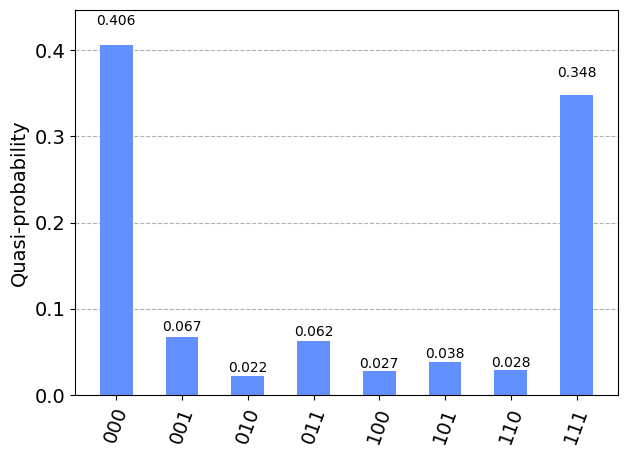

In [17]:
# Submit the circuit to run on Azure Quantum
job = qpu_backend.run(circuit, shots=1024)
job_id = job.id()
print("Job id", job_id)

# Get the job results (this method waits for the Job to complete):
result = job.result()
print(result)
counts = {format(n, "03b"): 0 for n in range(8)}
counts.update(result.get_counts(circuit))
print(counts)
plot_histogram(counts)